In [1]:
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Input,Dropout,BatchNormalization


In [2]:
root_dir = r"/Users/khantnyarkoko/Desktop/PML-0006-Khant-Nyar-Ko-Ko/6_deep_learning/CNN/cats_and_dogs_filtered"

In [3]:
BATCH_SIZE  = 64
EPOCHS = 20


dropout_rate = 0.4
initial_lr = 1e-3


In [4]:
input_img_size = (128,128)
input_shape = (128,128,3)

In [5]:
# Data Augmentation
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_ds = tf_generator.flow_from_directory(
    root_dir+"/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  
)
val_ds = tf_generator.flow_from_directory(
    root_dir+"/test",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode= 'categorical'
)

Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


[1. 0.]


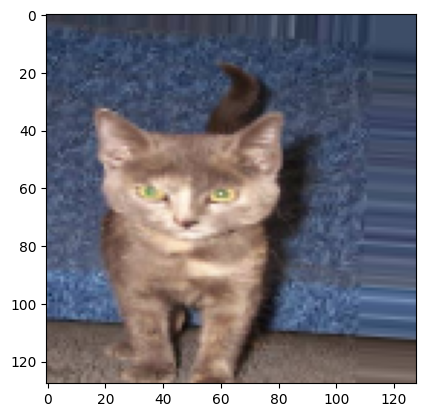

In [7]:
import matplotlib.pyplot as plt
for img,label in train_ds:
    test_img = img
    test_label = label
    break

print(test_label[0])
plt.imshow(test_img[0])

In [8]:
model = Sequential([

    Input(shape=input_shape),

    Conv2D(64, (3, 3), activation='relu', padding='same'),  # 1. Conv2D
    Conv2D(64, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),    
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu',padding='same'),
    Conv2D(128, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(256, (3, 3), activation='relu',padding='same'),
    Conv2D(256, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(512, (3, 3), activation='relu',padding='same'),
    Conv2D(512, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dropout(dropout_rate), 

    Dense(256, activation='relu'),
    Dropout(dropout_rate), 


    Dense(128, activation='relu'),

    Dense(2, activation='softmax')  #
    
])

In [9]:
from tensorflow.keras.optimizers import Adam

optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)


model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,111,234 (50.02 MB)

 Trainable params: 13,109,314 (50.01 MB)

 Non-trainable params: 1,920 (7.50 KB)

### Learning Rate Schedulars

In [10]:
#  exponential decay:
def exp_decay_lr_scheduler(epoch, lr):
    initial_lr = 1e-2
    end_lr = 1e-5
    decay_epochs = EPOCHS

    # Exponential decay formula
    decay_rate = (end_lr / initial_lr) ** (1 / decay_epochs)
    new_lr = initial_lr * (decay_rate ** epoch)

    print(f"[+] Epoch {epoch:2d} | LR: {new_lr:.6f}")
    return new_lr



In [11]:
# Cosine Annealing

import math

def cosine_annealing_scheduler(epoch, lr):
    initial_lr = 1e-2
    min_lr = 1e-5
    new_lr = min_lr + 0.5 * (initial_lr - min_lr) * (1 + math.cos(math.pi * epoch / EPOCHS))

    print(f"[+] Epoch {epoch:2d} | LR: {new_lr:.6f}")
    return new_lr



In [12]:
# Static Learning Rate Scheduler
base_learning_rate = 1e-3
def static_lr_scheduler(epoch, lr):
    total_epochs = EPOCHS
    
    check_1 = int(total_epochs*0.9)
    check_2 = int(total_epochs*0.7)
    check_3 = int(total_epochs*0.5)
    check_4 = int(total_epochs*0.3)

    if epoch > check_1:
        lr =  1e-5 # 0.000001
    elif  epoch > check_2:
        lr = 1e-4
    elif  epoch > check_3:
        lr = 1e-3

    else:
        lr = 1e-2

    print("[+] Current LR rate : {}".format(lr))
    return lr




In [13]:
# TensorFlow built-ins
tf_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=5,  # epochs or batches
    decay_rate=0.5,
    staircase=True  # set False for smooth decay
)

In [14]:
curstom_lr_callback = tf.keras.callbacks.LearningRateScheduler(exp_decay_lr_scheduler)

#curstom_lr_callback = tf.keras.callbacks.LearningRateScheduler(cosine_annealing_scheduler)

# curstom_lr_callback = tf.keras.callbacks.LearningRateScheduler(static_lr_scheduler)

### TensorBoard Callback

In [15]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,        # Log histograms every epoch (useful for weights, biases)
    write_graph=True,        # Visualize the model graph
    write_images=False,      # Log weight images (can be heavy)
    update_freq='epoch',     # 'batch' or 'epoch'
    profile_batch=0          # Set >0 to enable performance profiling
)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[
        curstom_lr_callback,ç
        tensorboard_callback
    ]
)

/opt/anaconda3/envs/first_conda_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


[+] Epoch  0 | LR: 0.010000
Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 309s 7s/step - accuracy: 0.4874 - loss: 13.0566 - val_accuracy: 0.5403 - val_loss: 0.6916 - learning_rate: 0.0100
[+] Epoch  1 | LR: 0.007079
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 333s 8s/step - accuracy: 0.4864 - loss: 0.7079 - val_accuracy: 0.5403 - val_loss: 0.6931 - learning_rate: 0.0071
[+] Epoch  2 | LR: 0.005012
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 348s 8s/step - accuracy: 0.4953 - loss: 0.6980 - val_accuracy: 0.4597 - val_loss: 0.6932 - learning_rate: 0.0050
[+] Epoch  3 | LR: 0.003548
Epoch 4/20


```bash
# run command
pipenv run tensorboard --logdir=logs/fit
```